In [99]:
import numpy as np

x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
y_train = np.array([5*i**2 + 7*i + 9 for i in x_train])

In [100]:
y_train

array([   9,   21,   43,   75,  117,  169,  231,  303,  385,  477,  579,
        691,  813,  945, 1087, 1239, 1401, 1573, 1755, 1947])

In [129]:
batch_size = 10

In [134]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(128, input_shape = (1,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss = keras.losses.Huber(),metrics=['accuracy'])

In [140]:
history = model.fit(x=x_train, 
                    y=y_train,
                    epochs=2000,
                    steps_per_epoch = len(x_train)//batch_size,
                    batch_size = batch_size,
                    validation_split = .2)

Epoch 1/2000
2/2 [==============================] - 0s 85ms/step - loss: 312.1473 - accuracy: 0.0000e+00 - val_loss: 1326.4260 - val_accuracy: 0.0000e+00
Epoch 2/2000
2/2 [==============================] - 0s 32ms/step - loss: 309.3552 - accuracy: 0.0000e+00 - val_loss: 1317.8285 - val_accuracy: 0.0000e+00
Epoch 3/2000
2/2 [==============================] - 0s 34ms/step - loss: 304.9643 - accuracy: 0.0000e+00 - val_loss: 1301.0701 - val_accuracy: 0.0000e+00
Epoch 4/2000
2/2 [==============================] - 0s 34ms/step - loss: 295.9720 - accuracy: 0.0000e+00 - val_loss: 1277.0671 - val_accuracy: 0.0000e+00
Epoch 5/2000
2/2 [==============================] - 0s 37ms/step - loss: 285.2512 - accuracy: 0.0000e+00 - val_loss: 1241.8372 - val_accuracy: 0.0000e+00
Epoch 6/2000
2/2 [==============================] - 0s 32ms/step - loss: 272.0141 - accuracy: 0.0000e+00 - val_loss: 1193.6523 - val_accuracy: 0.0000e+00
Epoch 7/2000
2/2 [==============================] - 0s 29ms/step - loss: 253

2/2 [==============================] - 0s 24ms/step - loss: 16.1736 - accuracy: 0.0000e+00 - val_loss: 110.2708 - val_accuracy: 0.0000e+00
Epoch 55/2000
2/2 [==============================] - 0s 25ms/step - loss: 15.3400 - accuracy: 0.0000e+00 - val_loss: 85.3056 - val_accuracy: 0.0000e+00
Epoch 56/2000
2/2 [==============================] - 0s 25ms/step - loss: 18.1406 - accuracy: 0.0000e+00 - val_loss: 90.8589 - val_accuracy: 0.0000e+00
Epoch 57/2000
2/2 [==============================] - 0s 28ms/step - loss: 15.7471 - accuracy: 0.0000e+00 - val_loss: 110.9181 - val_accuracy: 0.0000e+00
Epoch 58/2000
2/2 [==============================] - 0s 31ms/step - loss: 16.3213 - accuracy: 0.0000e+00 - val_loss: 90.0113 - val_accuracy: 0.0000e+00
Epoch 59/2000
2/2 [==============================] - 0s 29ms/step - loss: 15.5171 - accuracy: 0.0000e+00 - val_loss: 89.8205 - val_accuracy: 0.0000e+00
Epoch 60/2000
2/2 [==============================] - 0s 29ms/step - loss: 14.8289 - accuracy: 0.0000

KeyboardInterrupt: 

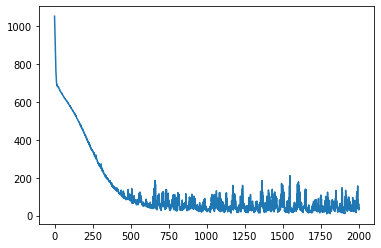

In [138]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [109]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_87 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_89 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 136       
_________________________________________________________________
flatten_21 (Flatten)         (None, 8)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)               

In [153]:
print(y_train.shape)
print(np.reshape(y_train.T,(-1, 1)).shape)

(20,)
(20, 1)


In [141]:
predictions = model.predict(x_train)

print(np.hstack((np.reshape(y_train.T,(-1,1)), np.around(predictions))))

[[   9.   84.]
 [  21.   84.]
 [  43.   84.]
 [  75.   87.]
 [ 117.  112.]
 [ 169.  161.]
 [ 231.  230.]
 [ 303.  304.]
 [ 385.  386.]
 [ 477.  481.]
 [ 579.  580.]
 [ 691.  688.]
 [ 813.  814.]
 [ 945.  945.]
 [1087. 1086.]
 [1239. 1234.]
 [1401. 1381.]
 [1573. 1514.]
 [1755. 1639.]
 [1947. 1750.]]
